In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
import sys
import os
sys.path.append('/Users/bpb/Data/programming/OpenMSI/openmsi-programmatic-access')
import openmsi
import numpy as np
from matplotlib import pyplot as plt

In [2]:
openmsi = reload(openmsi)
myFormula = 'C33H63O4'
f = openmsi.chemformula_struct(myFormula)
print f
m = openmsi.monoisotopicmass(myFormula)
print m
fList = openmsi.chemformula_list(myFormula)
print fList
mass,magnitude,monoisotopic = openmsi.isotope(fList,0)
print mass
print magnitude
print monoisotopic
# fList = [[63, 33, 0, 4, 0, 0, 0, 0],[63, 34, 0, 4, 0, 0, 0, 0],[65, 34, 0, 4, 0, 0, 0, 0],[67, 37, 0, 4, 0, 0, 0, 0],[69, 37, 0, 4, 0, 0, 0, 0]]
# [H, C, N, O, S, P, D, MassRemoved]



[('C', '33'), ('H', '63'), ('O', '4')]
523.472635511
[ 63.  33.   0.   4.   0.   0.   0.   0.]
[ 523.47297   524.476325  525.47968   526.483035  527.48639 ]
[ 0.67841847  0.25919058  0.05353867  0.00785231  0.00090579]
523.47297


In [3]:
myFormulae = ['C33H63O4','C34H63O4','C34H65O4','C37H67O4','C37H69O4']
fList = []
nList = []
mList = []
for formula in myFormulae:
    temp = openmsi.chemformula_list(formula)
    mList.append(openmsi.monoisotopicmass(formula))

    fList.append(list(temp))
    nList.append(20)
print list(fList)
print nList
print mList

[[63.0, 33.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0], [63.0, 34.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0], [65.0, 34.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0], [67.0, 37.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0], [69.0, 37.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0]]
[20, 20, 20, 20, 20]
[523.4726355107, 535.4726355107, 537.48828557490003, 575.50393563910006, 577.51958570329998]


(10, 28)
[ 523.565  524.565  525.57   526.575  527.575  528.58   529.585  530.585
  535.565  536.565  537.57   538.575  539.575  540.58   541.585  542.585
  543.6    544.6    575.595  576.6    577.6    578.605  579.61   580.61
  581.615  582.62   583.63   584.635]


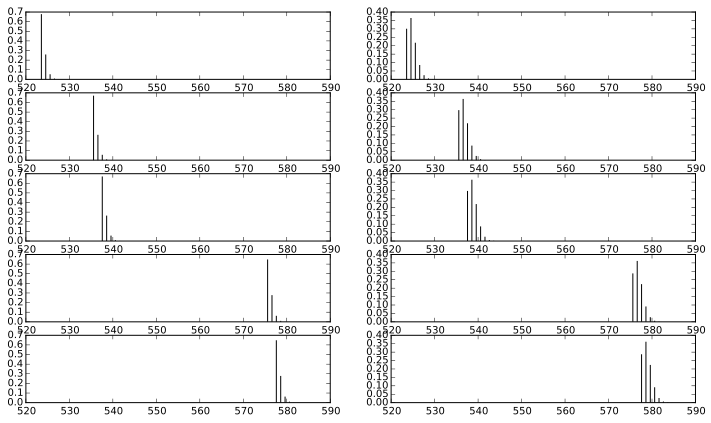

In [4]:
mzvec,isoY = openmsi.isotopic_pattern(fList, 0.04, nList)
print isoY.shape
mzvec = mzvec + 0.09
print mzvec


plt.figure(num=None, figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
for i in range(isoY.shape[0]):
    plt.subplot(5,2,i+1).vlines(mzvec,0,isoY[i,:])
#     plt.subplot(1,2,2).vlines(mzvec,0,isoY[1])
plt.show()